# Support Vector Machines: A Comprehensive Guide

## 1. Introduction to Support Vector Machines

### 1.1 What is a Support Vector Machine?

A **Support Vector Machine (SVM)** is a powerful supervised learning algorithm that finds the *optimal boundary* between classes. Unlike other classifiers that find any separating boundary, SVM finds the **best boundary** by maximizing the margin between classes.

Think of it as placing a street between two neighborhoods:

- A regular classifier would place **any street** that separates the neighborhoods.
- **SVM** would place the **widest possible street**, maximizing the distance to houses on both sides.
- The houses closest to the street (**support vectors**) define the street's width.

### 1.2 Key Concepts

- **Hyperplane**: The decision boundary separating classes.
- **Support Vectors**: The closest points to the hyperplane.
- **Margin**: The distance between support vectors and the hyperplane.
- **Hard Margin**: Perfect separation with maximum margin.
- **Soft Margin**: Allows some misclassifications for better generalization.


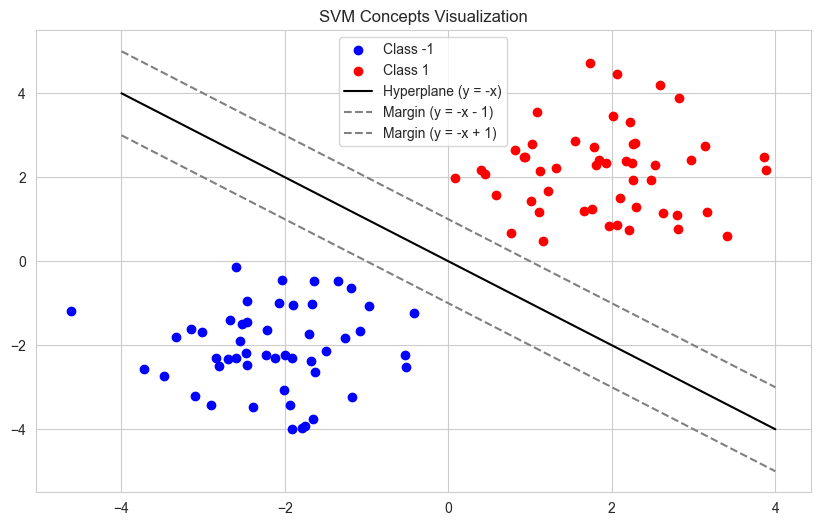

In [34]:
import numpy as np
import matplotlib.pyplot as plt


# Function for generating dataset
def generate_data(seed=42):
    np.random.seed(seed)
    class_1 = np.random.randn(50, 2) - [2, 2]
    class_2 = np.random.randn(50, 2) + [2, 2]
    X = np.concatenate([class_1, class_2])
    y = np.array([-1] * 50 + [1] * 50)
    return X, y


# Generate simple dataset
X, y = generate_data()

# Visualize concepts
plt.figure(figsize=(10, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', label='Class -1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1')

# Define hyperplane and margins
x_values = np.linspace(-4, 4, 100)  # Define range of x values for the plot
hyperplane_y = -x_values  # y = -x
margin1_y = -x_values - 1  # Lower margin (y = -x - 1)
margin2_y = -x_values + 1  # Upper margin (y = -x + 1)

# Plot the hyperplane and margins
plt.plot(x_values, hyperplane_y, c='black', linestyle='-', linewidth=1.5,
         label='Hyperplane (y = -x)')
plt.plot(x_values, margin1_y, c='gray', linestyle='--', label='Margin (y = -x - 1)')
plt.plot(x_values, margin2_y, c='gray', linestyle='--', label='Margin (y = -x + 1)')

# Title and legend
plt.title('SVM Concepts Visualization')
plt.legend()
plt.show()


# 2. Linear SVM: Mathematical Foundation

## 2.1 The Basic Formula
For a **linear SVM**, we want to find a **hyperplane**:

$$ w \cdot x + b = 0 $$

Where:

- **$w$**: Normal vector to the hyperplane
- **$x$**: Input features
- **$b$**: Bias term

---

## 2.2 Classification Rule
A point is classified based on:

$$ f(x) = \text{sign}(w \cdot x + b) $$

- **If** $w \cdot x + b > 0$: Class +1
- **If** $w \cdot x + b < 0$: Class -1

---

## 2.3 Margin Optimization
The optimization problem is defined as:

$$ \min_{w, b} \frac{1}{2} \|w\|^2 $$

**Subject to:**

$$ y_i (w \cdot x_i + b) \geq 1 \quad \text{for all } i $$

This maximizes the margin while ensuring correct classification.

## SVM Optimization and Weight Updates

### Objective Function for Linear SVM
For a linear SVM, the optimization objective is to **minimize** the following:

$$ L(w, b) = \frac{1}{2} ||w||^2 + C \sum_{i=1}^n \max(0, 1 - y_i(w^T x_i + b)) $$

Here:
- \( ||w||^2 \): Regularization term on the weight vector \( w \) (to ensure the weights remain small).
- \( C \): Regularization parameter that balances the trade-off between maximizing the margin and minimizing classification errors.
- \( \max(0, 1 - y_i(w^T x_i + b)) \): Hinge loss for each training data point, penalizing points that fall inside the margin or are misclassified.

---

### Weight Update Rules
The **weight updates** are derived from performing **gradient descent** on the objective function.

#### **For the Weight Vector \( w \):**

When using **stochastic gradient descent (SGD)**, for each point \( (x_i, y_i) \):

1. **If \( y_i(w^T x_i + b) \geq 1 \):**
   (The point is correctly classified and outside the margin)
   $$ w_{\text{new}} = w - \eta \cdot w $$

2. **If \( y_i(w^T x_i + b) < 1 \):**
   (The point is either misclassified or inside the margin)
   $$ w_{\text{new}} = w - \eta \left(w - C y_i x_i \right) $$

---

#### **For the Bias Term \( b \):**

1. **If \( y_i(w^T x_i + b) \geq 1 \):**
   (No update is needed as the point is correctly classified and outside the margin)
   $$ b_{\text{new}} = b $$

2. **If \( y_i(w^T x_i + b) < 1 \):**
   (The point is either misclassified or inside the margin)
   $$ b_{\text{new}} = b + \eta \cdot C \cdot y_i $$

---

### Explanation of Variables
- \( \eta \): Learning rate (controls the step size during gradient descent).
- \( C \): Regularization parameter (weights the hinge loss versus regularization).
- \( y_i \): Class label for a given data point (\(+1\) or \(-1\)).
- \( x_i \): Input feature vector.

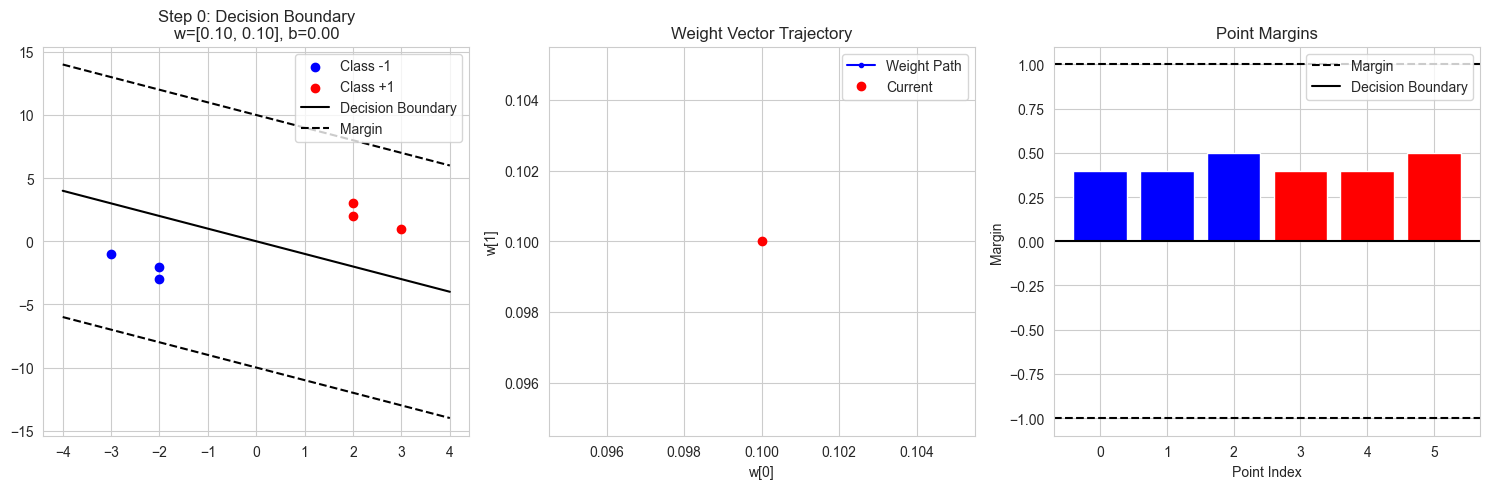


Step 0:
Weights: [1.146, 1.008]
Bias: -0.000
Margins: [4.307 4.445 5.314 4.307 4.445 5.314]


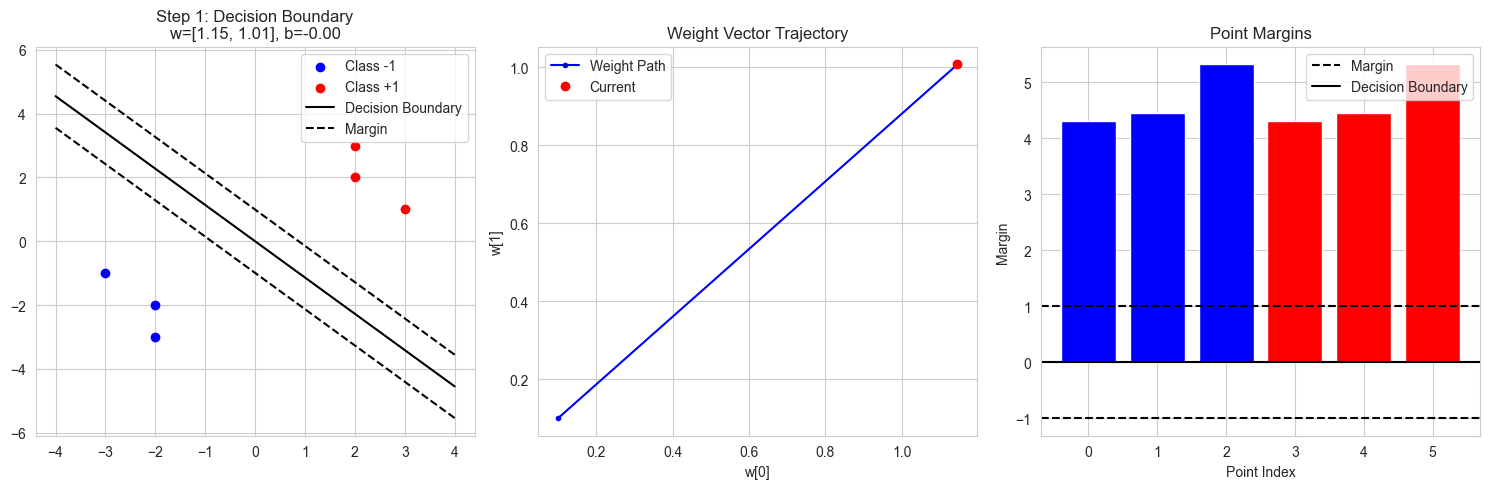


Step 1:
Weights: [0.609, 0.535]
Bias: -0.000
Margins: [2.289 2.362 2.824 2.289 2.362 2.824]


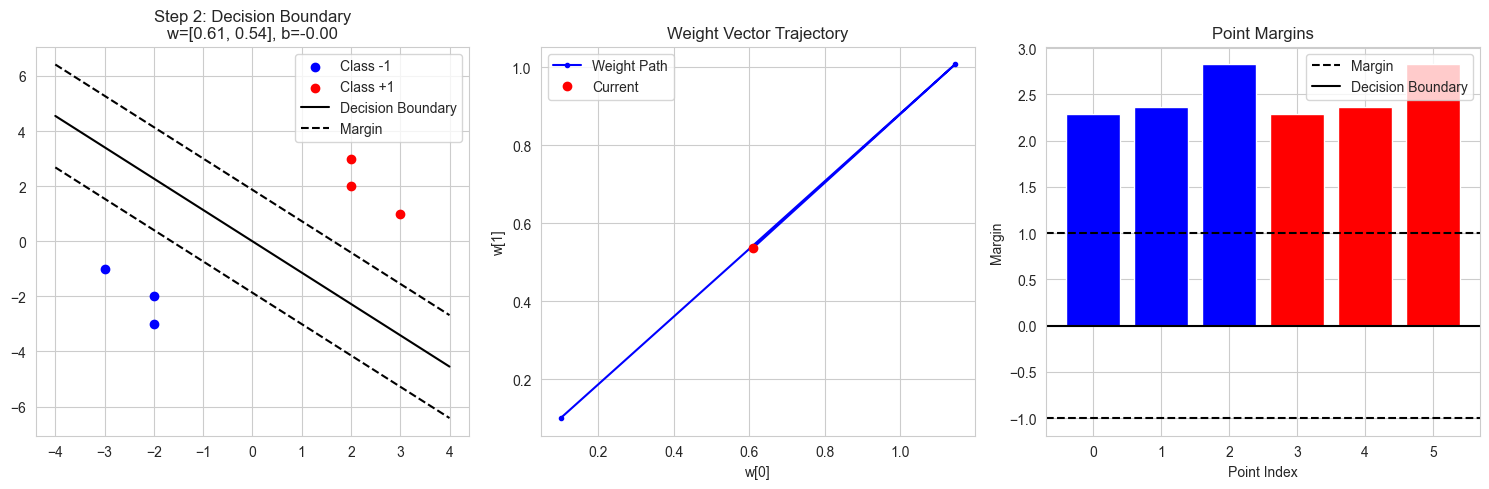


Step 2:
Weights: [0.324, 0.285]
Bias: -0.000
Margins: [1.216 1.255 1.501 1.216 1.255 1.501]


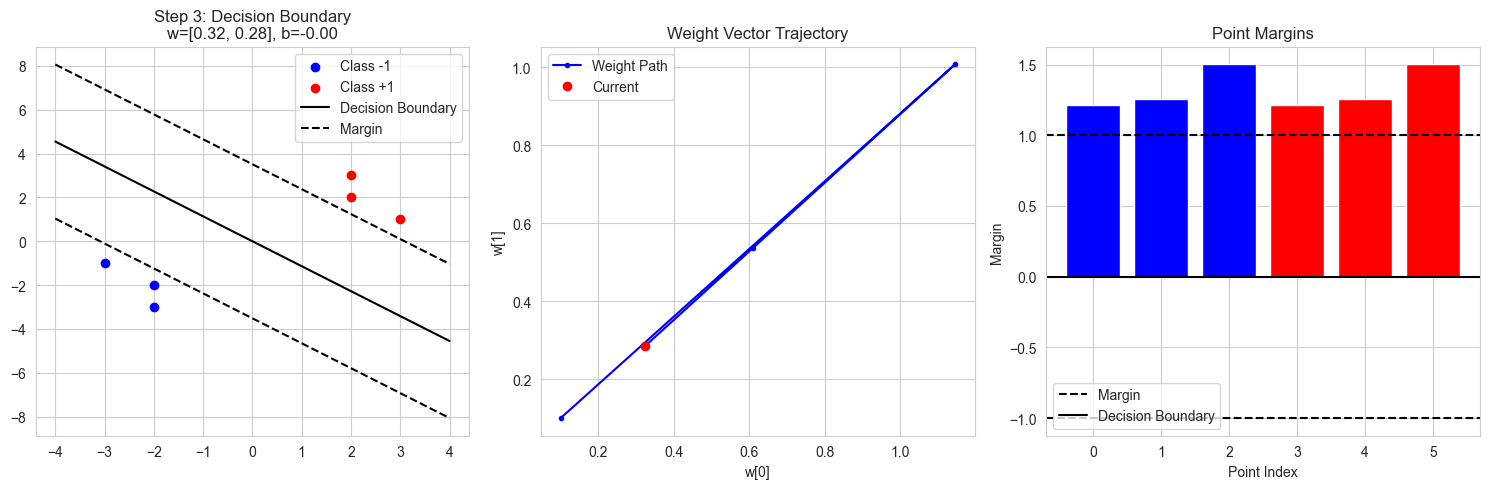


Step 3:
Weights: [0.172, 0.151]
Bias: -0.000
Margins: [0.646 0.667 0.798 0.646 0.667 0.798]


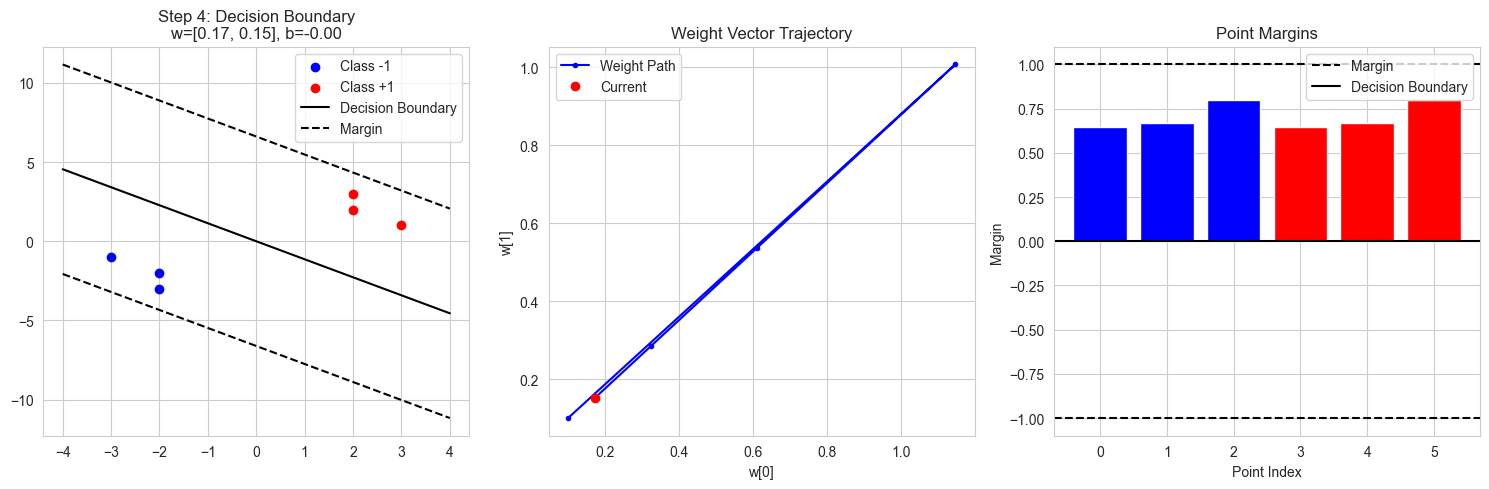


Step 4:
Weights: [1.184, 1.035]
Bias: -0.000
Margins: [4.438 4.587 5.473 4.438 4.587 5.473]


In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X_neg = np.array([[-2, -2], [-3, -1], [-2, -3]], dtype=float)
X_pos = np.array([[2, 2], [3, 1], [2, 3]], dtype=float)
X = np.vstack([X_neg, X_pos])
y = np.array([-1, -1, -1, 1, 1, 1], dtype=float)

class SVMUpdates:
    def __init__(self, learning_rate=0.1, C=1.0):
        self.lr = learning_rate
        self.C = C
        self.w = np.array([0.1, 0.1], dtype=float)
        self.b = 0.0
        self.history = {'w': [], 'b': [], 'margins': []}

    def get_margin(self, X, y):
        return y * (np.dot(X, self.w) + self.b)

    def step(self, X, y):
        self.history['w'].append(self.w.copy())
        self.history['b'].append(self.b)
        margins = self.get_margin(X, y)
        self.history['margins'].append(margins)

        # Update for one point
        for i in range(len(X)):
            margin = margins[i]
            if margin < 1:  # Point is inside margin or misclassified
                self.w = self.w - self.lr * (self.w - self.C * y[i] * X[i])
                self.b = self.b + self.lr * self.C * y[i]
            else:  # Point is correctly classified and outside margin
                self.w = self.w - self.lr * self.w

def plot_svm_step(X, y, svm, step):
    plt.figure(figsize=(15, 5))

    # Plot 1: Decision boundary
    plt.subplot(131)
    plt.scatter(X_neg[:, 0], X_neg[:, 1], c='blue', label='Class -1')
    plt.scatter(X_pos[:, 0], X_pos[:, 1], c='red', label='Class +1')

    # Plot decision boundary and margins
    x_range = np.array([X[:, 0].min() - 1, X[:, 0].max() + 1])
    w = svm.history['w'][step]
    b = svm.history['b'][step]

    decision_line = lambda x: (-w[0] * x - b) / w[1]
    margin_up = lambda x: (-w[0] * x - b + 1) / w[1]
    margin_down = lambda x: (-w[0] * x - b - 1) / w[1]

    plt.plot(x_range, decision_line(x_range), 'k-', label='Decision Boundary')
    plt.plot(x_range, margin_up(x_range), 'k--', label='Margin')
    plt.plot(x_range, margin_down(x_range), 'k--')

    plt.title(f'Step {step}: Decision Boundary\nw=[{w[0]:.2f}, {w[1]:.2f}], b={b:.2f}')
    plt.legend()
    plt.grid(True)

    # Plot 2: Weight trajectory
    plt.subplot(132)
    w_history = np.array(svm.history['w'][:step+1])
    plt.plot(w_history[:, 0], w_history[:, 1], 'b.-', label='Weight Path')
    plt.plot(w_history[-1, 0], w_history[-1, 1], 'ro', label='Current')
    plt.title('Weight Vector Trajectory')
    plt.xlabel('w[0]')
    plt.ylabel('w[1]')
    plt.legend()
    plt.grid(True)

    # Plot 3: Margins
    plt.subplot(133)
    margins = svm.history['margins'][step]
    plt.bar(range(len(X)), margins, color=['blue']*3 + ['red']*3)
    plt.axhline(y=1, color='k', linestyle='--', label='Margin')
    plt.axhline(y=-1, color='k', linestyle='--')
    plt.axhline(y=0, color='k', label='Decision Boundary')
    plt.title('Point Margins')
    plt.xlabel('Point Index')
    plt.ylabel('Margin')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Train and visualize
svm = SVMUpdates(learning_rate=0.1, C=1.0)

# Show several steps
for step in range(5):
    svm.step(X, y)
    plot_svm_step(X, y, svm, step)
    print(f"\nStep {step}:")
    print(f"Weights: [{svm.w[0]:.3f}, {svm.w[1]:.3f}]")
    print(f"Bias: {svm.b:.3f}")
    margins = svm.get_margin(X, y)
    print("Margins:", margins.round(3))

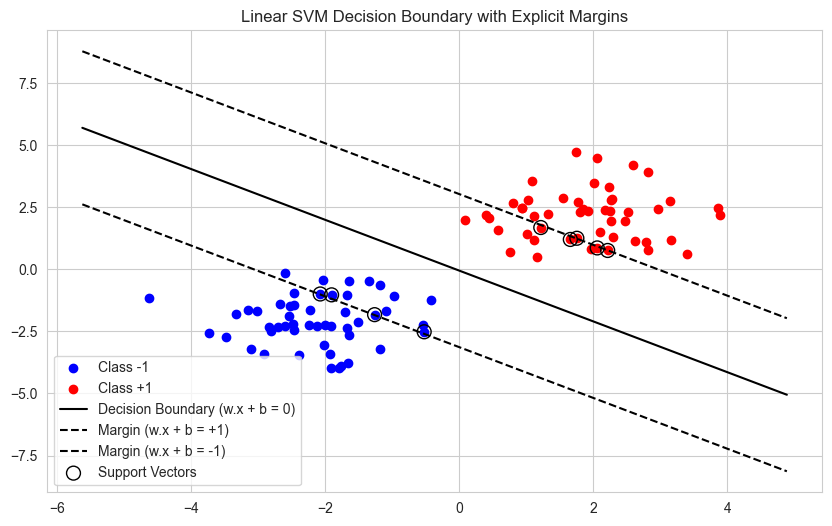

In [39]:
import numpy as np
import matplotlib.pyplot as plt


# Define Linear SVM Class
class LinearSVM:
    def __init__(self, learning_rate=0.001, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    # Update weights with zero gradient for correctly classified points
                    self.w -= self.lr * self.w
                else:
                    # Update weights and bias for misclassified points
                    self.w -= self.lr * (self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * (-y[idx])

    def predict(self, X):
        # Predict using the sign of the decision function
        return np.sign(np.dot(X, self.w) + self.b)


# Generate a linearly separable dataset
np.random.seed(42)
X = np.concatenate([
    np.random.randn(50, 2) - [2, 2],  # Class -1
    np.random.randn(50, 2) + [2, 2]  # Class +1
])
y = np.array([-1] * 50 + [1] * 50)  # Class labels

# Train the SVM
svm = LinearSVM()
svm.fit(X, y)


# Define functions for the decision boundary and margins
def decision_boundary(x, w, b):
    return -(w[0] * x + b) / w[1]


def margin_line(x, w, b, offset):
    return -(w[0] * x + b + offset) / w[1]


# Generate line points for plotting decision boundary and margins
x_vals = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
decision_line_y = decision_boundary(x_vals, svm.w, svm.b)
margin_up_y = margin_line(x_vals, svm.w, svm.b, 1)  # Upper margin (offset = +1)
margin_down_y = margin_line(x_vals, svm.w, svm.b, -1)  # Lower margin (offset = -1)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', label='Class -1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class +1')

# Plot the decision boundary and margins
plt.plot(x_vals, decision_line_y, 'k-', label='Decision Boundary (w.x + b = 0)')
plt.plot(x_vals, margin_up_y, 'k--', label='Margin (w.x + b = +1)')
plt.plot(x_vals, margin_down_y, 'k--', label='Margin (w.x + b = -1)')

# Highlight the support vectors
support_vectors = (y * (np.dot(X, svm.w) + svm.b) - 1).round(2)
support_vector_indices = \
    np.where((support_vectors >= -0.05) & (support_vectors <= 0.05))[0]
plt.scatter(X[support_vector_indices, 0], X[support_vector_indices, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Add title and legend
plt.title('Linear SVM Decision Boundary with Explicit Margins')
plt.legend()
plt.show()


# 3. Non-linear SVM and The Kernel Trick

## 3.1 The Problem with Linear Boundaries

Sometimes data can't be separated by a straight line. Consider data points arranged in concentric circles – no straight line can separate them. This is a common problem in real-world datasets where relationships between features are non-linear.

For example:
- Points in an inner circle might belong to class A
- Points in an outer ring might belong to class B
- No straight decision boundary can correctly separate these classes

## 3.2 The Kernel Solution

The **kernel trick** maps data from the input space to a higher-dimensional feature space where it becomes linearly separable. This mapping is represented by the function $\phi$:

$$
\phi: \mathbb{R}^d \rightarrow \mathcal{H}
$$

Where:
- $\mathbb{R}^d$ is the input space with d dimensions
- $\mathcal{H}$ is a higher-dimensional (possibly infinite) feature space
- $\phi$ is the mapping function

## 3.3 Mathematical Formulation

Instead of computing $\phi(x)$ directly, which could be computationally expensive or even infinite-dimensional, we use **kernel functions**. A kernel function computes the inner product in the feature space:

$$
K(x_i, x_j) = \langle \phi(x_i), \phi(x_j) \rangle
$$

This is the essence of the kernel trick: we never need to explicitly compute $\phi(x)$!

### Common Kernels:

1. **RBF (Gaussian) Kernel:**

   $$
   K(x_i, x_j) = \exp\left(-\gamma \|x_i - x_j\|^2\right)
   $$

   Where:
   - $\gamma$ is a hyperparameter controlling the width of the Gaussian
   - $\|x_i - x_j\|^2$ is the squared Euclidean distance between points
   - This kernel maps to an infinite-dimensional space
   - Best for non-linear data when the relationship between features is unknown

2. **Polynomial Kernel:**

   $$
   K(x_i, x_j) = \left(x_i \cdot x_j + c\right)^d
   $$

   Where:
   - $d$ is the degree of the polynomial
   - $c$ is a constant term (often 1)
   - Good for problems where feature interactions are important

## 3.4 Choosing the Right Kernel

The choice of kernel depends on your data:

1. **Linear Kernel:** $K(x_i, x_j) = x_i \cdot x_j$
   - Use when data is linearly separable
   - Fastest to compute
   - No hyperparameters to tune

2. **RBF Kernel:**
   - Most versatile, works well in most cases
   - Need to tune $\gamma$ parameter
   - Can overfit if $\gamma$ is too large

3. **Polynomial Kernel:**
   - Good for computer vision and natural language processing
   - Need to tune degree $d$ and coefficient $c$
   - Can be slow for high degrees

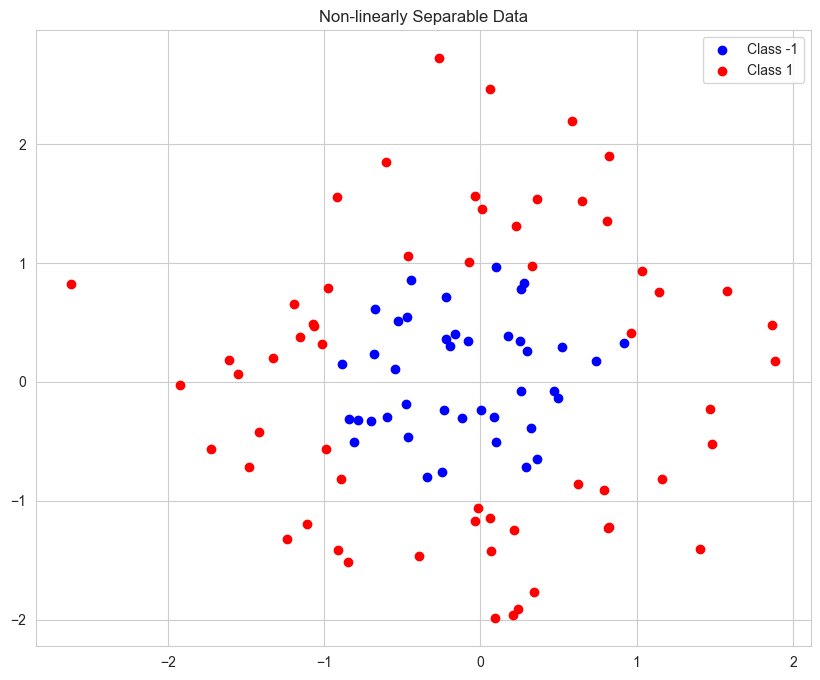

In [25]:
# Generate non-linearly separable data
def generate_nonlinear_data(n_samples=100):
    np.random.seed(42)
    X = np.random.randn(n_samples, 2)
    y = np.sign(X[:, 0]**2 + X[:, 1]**2 - 1)
    return X, y

X_nonlinear, y_nonlinear = generate_nonlinear_data()

# Try linear SVM
svm_linear = LinearSVM()
svm_linear.fit(X_nonlinear, y_nonlinear)

plt.figure(figsize=(10, 8))
plt.scatter(X_nonlinear[y_nonlinear==-1][:, 0], X_nonlinear[y_nonlinear==-1][:, 1],
            c='blue', label='Class -1')
plt.scatter(X_nonlinear[y_nonlinear==1][:, 0], X_nonlinear[y_nonlinear==1][:, 1],
            c='red', label='Class 1')
plt.title('Non-linearly Separable Data')
plt.legend()
plt.show()

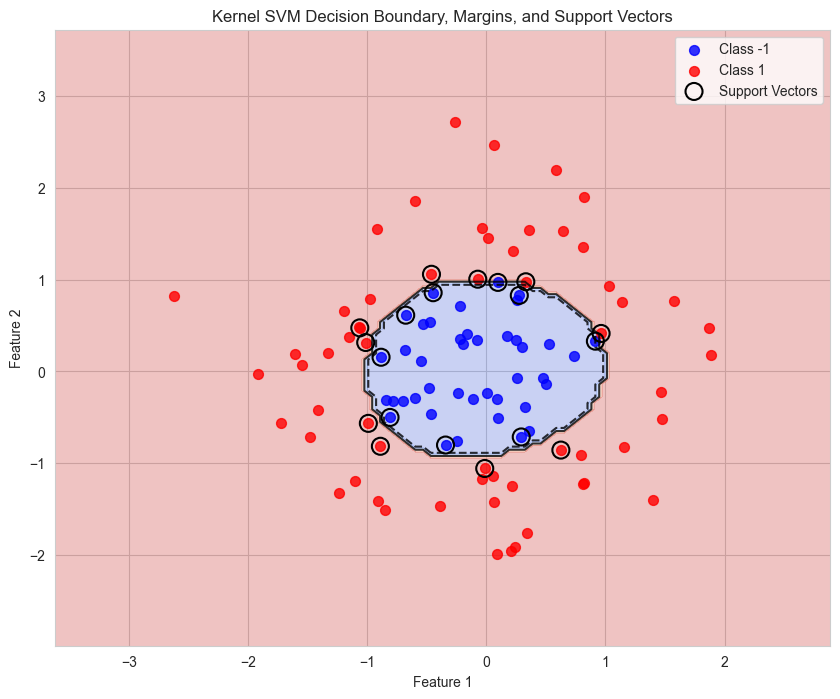

In [46]:
from scipy.optimize import minimize
import numpy as np


class KernelSVM:
    def __init__(self, kernel='rbf', C=1.0, gamma=1.0):
        self.kernel = kernel
        self.C = C
        self.gamma = gamma
        self.alpha = None
        self.support_vectors = None
        self.support_vector_labels = None
        self.b = None

    def _kernel_function(self, x1, x2):
        if self.kernel == 'linear':
            return np.dot(x1, x2)
        elif self.kernel == 'rbf':
            return np.exp(-self.gamma * np.sum((x1 - x2) ** 2))
        else:
            raise ValueError("Unknown kernel type")

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Compute kernel matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self._kernel_function(X[i], X[j])

        # Define the objective function for dual optimization
        def objective(alpha):
            return 0.5 * np.sum(
                alpha[:, None] * alpha[None, :] * y[:, None] * y[None, :] * K
            ) - np.sum(alpha)

        # Constraints
        constraints = [
            {
                'type': 'eq',
                'fun': lambda alpha: np.dot(alpha, y),  # Sum of alpha_i * y_i = 0
            }
        ]
        bounds = [(0, self.C) for _ in range(n_samples)]  # 0 <= alpha_i <= C

        # Initial guess for alpha
        initial_alpha = np.zeros(n_samples)

        # Solve the QP using scipy's minimize
        solution = minimize(
            fun=objective,
            x0=initial_alpha,
            bounds=bounds,
            constraints=constraints,
            method='SLSQP'
        )
        self.alpha = solution.x

        # Identify support vectors
        sv_idx = self.alpha > 1e-5
        self.support_vectors = X[sv_idx]
        self.support_vector_labels = y[sv_idx]
        self.alpha = self.alpha[sv_idx]

        # Compute bias term
        self.b = np.mean(
            self.support_vector_labels -
            np.sum(
                self.alpha[:, None] * self.support_vector_labels[:, None] * K[sv_idx][:,
                                                                            sv_idx],
                axis=0)
        )

    def predict(self, X):
        y_pred = np.zeros(len(X))
        for i, x in enumerate(X):
            s = 0
            for alpha_i, sv_i, y_i in zip(self.alpha,
                                          self.support_vectors,
                                          self.support_vector_labels):
                s += alpha_i * y_i * self._kernel_function(x, sv_i)
            y_pred[i] = s
        return np.sign(y_pred + self.b)


# Apply Kernel SVM to non-linear data
kernel_svm = KernelSVM(kernel='rbf', C=10.0, gamma=0.5)  # Adjust C and gamma
kernel_svm.fit(X_nonlinear, y_nonlinear)

# Plot results
def plot_kernel_svm():
    # Generate mesh grid for the decision boundary
    xx, yy = np.meshgrid(np.linspace(X_nonlinear[:, 0].min() - 1,
                                     X_nonlinear[:, 0].max() + 1, 100),
                         np.linspace(X_nonlinear[:, 1].min() - 1,
                                     X_nonlinear[:, 1].max() + 1, 100))

    # Flatten the grid and predict for each point (to create contour regions)
    Z = kernel_svm.predict(np.c_[xx.ravel(), yy.ravel()])  # Predictions for the grid
    Z = Z.reshape(xx.shape)  # Reshape into mesh format

    # Plot decision boundary and classification regions
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)  # Classification regions

    # Plot decision boundary and margin lines
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.8,
                linestyles=['--', '-', '--'],
                linewidths=1.5)  # Decision boundary + margins

    # Scatter points for each class
    plt.scatter(X_nonlinear[y_nonlinear == -1][:, 0],
                X_nonlinear[y_nonlinear == -1][:, 1],
                c='blue', label='Class -1', s=50, alpha=0.8)
    plt.scatter(X_nonlinear[y_nonlinear == 1][:, 0],
                X_nonlinear[y_nonlinear == 1][:, 1],
                c='red', label='Class 1', s=50, alpha=0.8)

    # Highlight support vectors
    plt.scatter(kernel_svm.support_vectors[:, 0],
                kernel_svm.support_vectors[:, 1],
                s=150, edgecolors='k', facecolors='none', linewidth=1.5,
                label='Support Vectors', zorder=10)  # Hollow black circles

    # Titles and labels
    plt.title('Kernel SVM Decision Boundary, Margins, and Support Vectors')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

plot_kernel_svm()

## 4. Soft Margin SVM

### 4.1 The Need for Soft Margins

Real-world data often contains **noise** or **outliers**. Rigid separation with a **hard margin** can lead to **overfitting**, as the model tries to perfectly classify even noisy or unreliable points.

### 4.2 Mathematical Formulation

To account for such imperfections, we introduce **slack variables** ($\xi_i$), along with a **penalty parameter** ($C$) to control the trade-off between maximizing the margin and minimizing the classification error.

#### Optimization Objective:

$$
\min_{w, b, \xi} \quad \frac{1}{2} |w|^2 + C \sum_{i=1}^{n} \xi_i
$$

#### Subject to Constraints:

$$
y_i (w \cdot x_i + b) \geq 1 - \xi_i \quad \text{for all } i
$$
$$
\xi_i \geq 0 \quad \text{for all } i
$$

Here:
- **w**: Weight vector for the hyperplane
- **b**: Bias term of the hyperplane
- $\xi_i$: Non-negative slack variables to measure the degree of misclassification or margin violation
- $C$: Penalty parameter to balance margin size and misclassification cost
